# 1.
Постройте график по данным из station_stat_full, где для каждой АЗС будет отдельная точка: по горизонтальной оси — число заездов на АЗС, по вертикальной — медианное время заправки. Добавьте линии сетки.

Подсказка
Примените метод plot() к датафрейму station_stat_full, задайте тип scatter, передайте параметрам x и y названия столбцов count и time_spent соответственно. Включите линию сетки параметром grid=True.

<AxesSubplot:xlabel='count', ylabel='time_spent'>

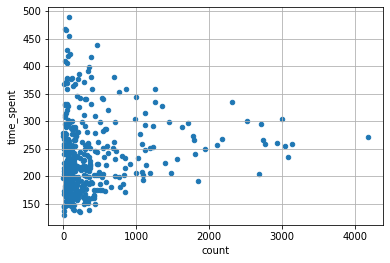

In [2]:
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')

# фильтруем слишком быстрые и медленные заезды и АЗС
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

# считаем данные по отдельным АЗС и по сетям
station_stat = data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_stations_stat)
#station_stat_full.info()
station_stat_full.plot(kind='scatter',
                       x='count',
                       y='time_spent',
                       grid=True)